In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark', {'axes.grid' : False})

In [63]:
df = pd.read_csv('Mall_Customers_clean.csv')
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
print(df.shape)
df.dtypes

(200, 5)


CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

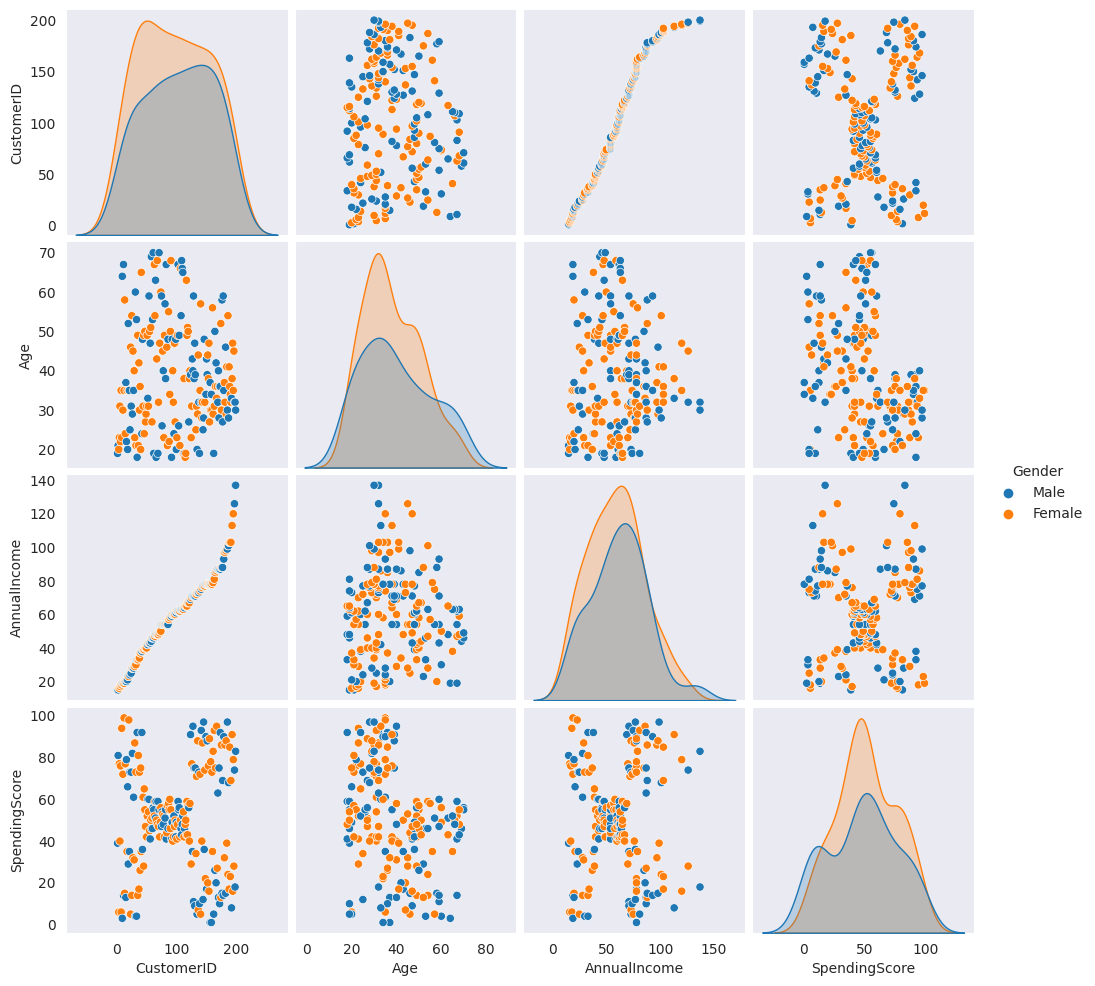

In [65]:
# Visualization
sns.pairplot(df, hue='Gender')

<AxesSubplot: >

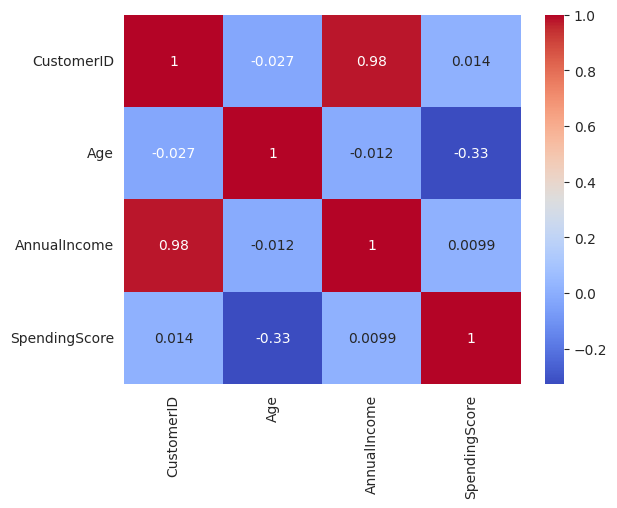

In [66]:
# correlation

# removing object-type columns
df_num = df.loc[:, ~(df.dtypes == object)]
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='Gender', ylabel='SpendingScore'>

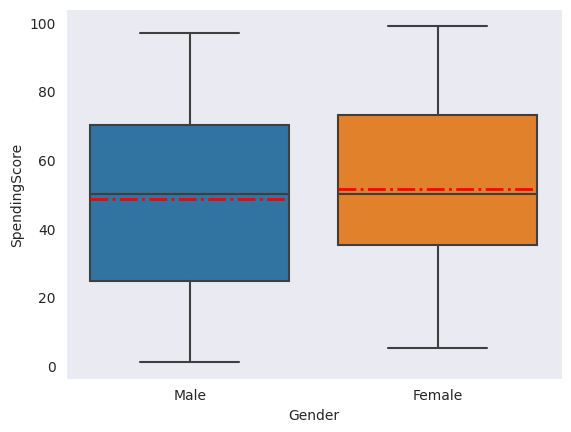

In [67]:
# Spending score across genders
sns.boxplot(data=df, x="Gender", y="SpendingScore", showmeans=True, meanline=True,
  meanprops = dict(linestyle='-.', linewidth=2, color='red'))

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'AnnualIncome'}>,
        <AxesSubplot: title={'center': 'SpendingScore'}>]], dtype=object)

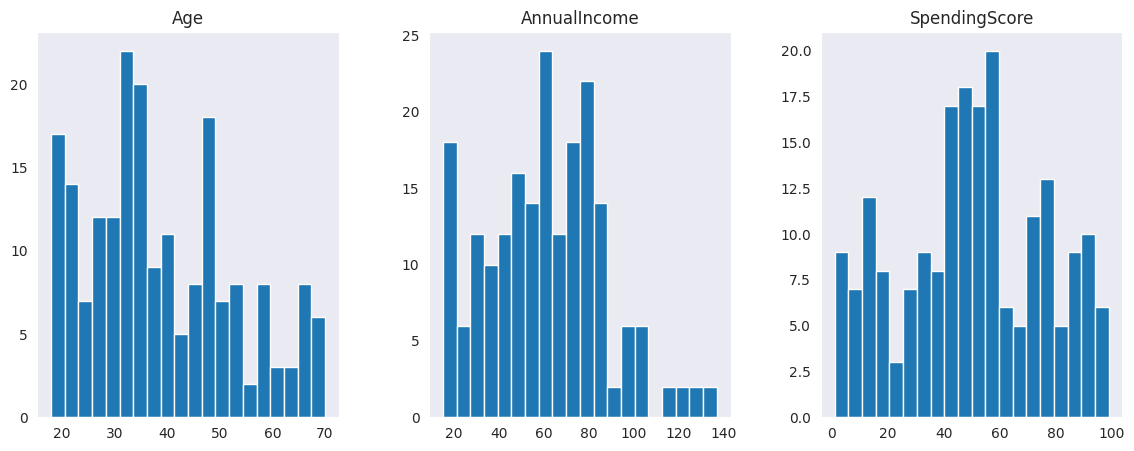

In [68]:
# visualize distributions
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(figsize=(14, 5), bins=20, grid=False, layout=(1, -1))

### Principal Component Analysis

In [69]:
# normalizing data for principal component analysis
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df_num)

# checking normality
print(X.shape, np.mean(X), np.std(X))

(200, 4) -1.1546319456101628e-16 1.0


In [70]:
# principal component analysis
from sklearn.decomposition import PCA

pca = PCA()
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(pcs[:, 0:2], columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-2.403924,-0.816423
1,-2.348416,-1.866763
2,-2.393558,0.142008
3,-2.307126,-1.653214
4,-2.332853,-0.230933
...,...,...
195,2.814551,-0.848381
196,2.901838,1.066724
197,3.003162,-0.853253
198,3.246850,0.699859


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

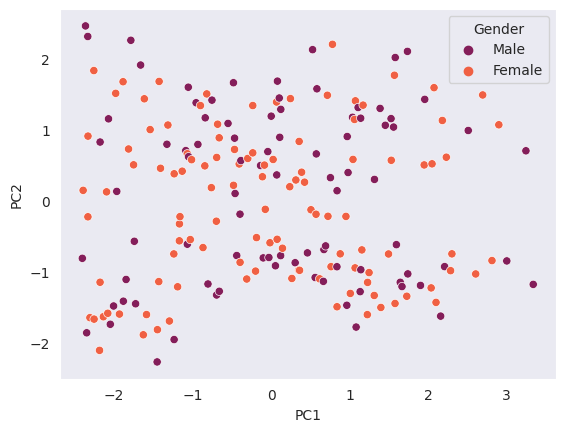

In [71]:
# visualize data on PC axes

# adding back variables for further analysis
pca_df['Gender'] = df[['Gender']]

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Gender', palette='rocket')

It is difficult to say what is the appropriate number of clusters only by visualizing the data on the first two significant PC axes, so we move on to the elbow method.

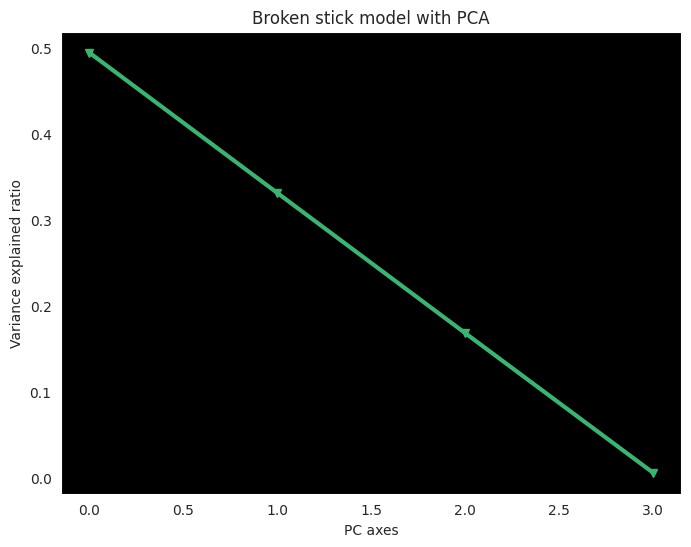

In [72]:
# determine the appropriate number of clusters with the elbow method

fig, axes = plt.subplots(figsize=(8, 6))
axes.set_facecolor('black')
plt.xlabel('PC axes')
plt.ylabel('Variance explained ratio')
plt.title('Broken stick model with PCA')
plt.plot(
  pca.explained_variance_ratio_,
  color='mediumseagreen',
  marker="v",
  linestyle='solid',
  linewidth=3
)

As there is no distinct point where the variance drop diminishes, we will go with the maximum of 4 clusters.

### K-Means Clustering

In [73]:
# model K-Means classifier
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)

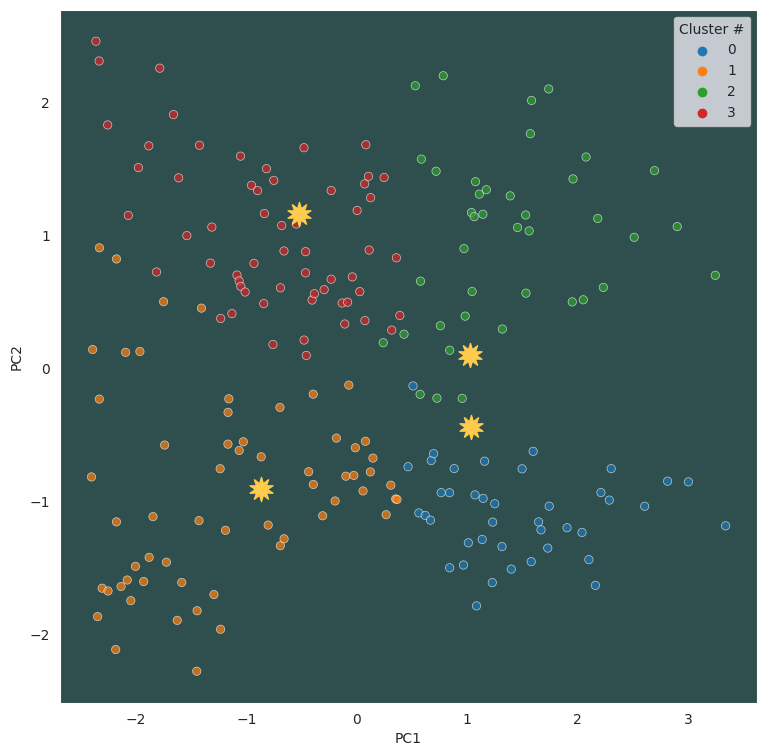

In [74]:
# visualize clusters

labels = kmeans.labels_
centres = kmeans.cluster_centers_[:, 0:2]
pca_df['Cluster #'] = labels

fig, ax = plt.subplots(figsize=(9, 9))
ax.set_facecolor('darkslategray')

# plot pca transformed data on the first two axes & then the cluster centres
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster #', palette='tab10', alpha=0.7)
plt.scatter(x=centres[:, 0], y=centres[:, 1], marker=(10, 1, 0), c='#ffcb4c', s=300)